## Support Vector Machines with 2D Datasets to visualize How It works

### 1.1 Importing the Modules (For First DataSet)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Importing the DataSet

In [3]:
data = sio.loadmat('ex6data1.mat')
X = data['X']  # 51 x 2 matrix
y = data['y']  # 51 x 1 matrix

Visualizing First DataSet

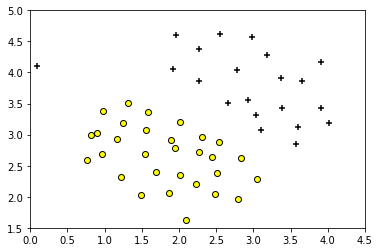

In [4]:
pos = (y == 1).ravel()         #flattens i.e. makes 1d array
neg = (y == 0).ravel()         #alternative code neg = np.array([X[i] for i in xrange(X.shape[0]) if y[i] == 0])
plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
plt.scatter(X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
plt.xlim(0, 4.5)
plt.ylim(1.5, 5)
plt.show()

Finding the best fit line by using Maximum Margin Classifier.

Here we will use C = 1 to have OK with the error but maximum margin. In other words, we are not penalizing errors with higher constant value.

We will use kernel = Linear for this classification from SVC Class.

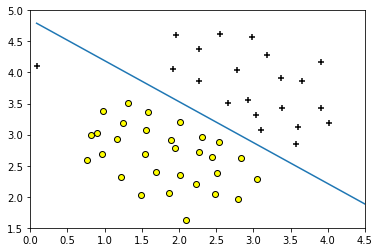

In [5]:
C = 1  #default
svm = SVC(kernel='linear', C=C)
svm.fit(X, y.ravel())
weights = svm.coef_[0]
intercept = svm.intercept_[0]
#draw svm boundary
xp = np.linspace(X.min(), X.max(), 100)
yp = - (weights[0] * xp + intercept) / weights[1]

#Visualizing data again with SVM Classifier
pos = (y == 1).ravel()
neg = (y == 0).ravel()
plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
plt.scatter(X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
plt.plot(xp, yp)
plt.xlim(0, 4.5)
plt.ylim(1.5, 5)
plt.show()

Let's try different value of C say 100 and then visualize the decision boundary.

We will observe the error to be reduced as much as possible and how margin classifier is affected with value of C.

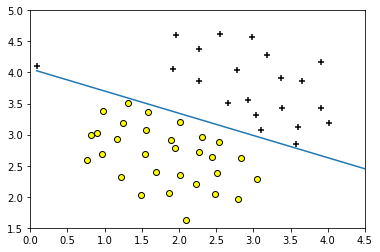

In [6]:
C = 100  #Regularization with large values
svm = SVC(kernel='linear', C=C)
svm.fit(X, y.ravel())
weights = svm.coef_[0]
intercept = svm.intercept_[0]
#draw svm boundary
xp = np.linspace(X.min(), X.max(), 100)
yp = - (weights[0] * xp + intercept) / weights[1]

pos = (y == 1).ravel()
neg = (y == 0).ravel()
plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
plt.scatter(X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
plt.plot(xp, yp)
plt.xlim(0, 4.5)
plt.ylim(1.5, 5)
plt.show()

Now you will observe the classifier classifies evertthing perfectly but misses the maximum margin classifier rule.

So value of C largely affects the SVM classifier model.

### 1.2 SVM with Gaussian Kernels for Non-Linear Classification Model.

Importing the Second DataSet

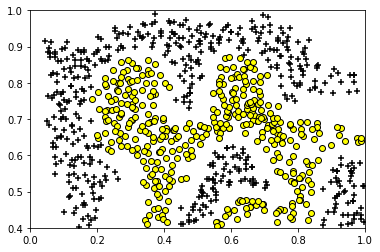

In [7]:
#Visualizing Dataset 2 
data = sio.loadmat('ex6data2.mat')
X = data['X']  # 863 x 2 matrix
y = data['y']  # 863 x 1 matrix

pos = (y == 1).ravel()
neg = (y == 0).ravel()
plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
plt.scatter(X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
plt.xlim(0, 1)
plt.ylim(0.4, 1)
plt.show()


Here we will use Gaussian Kernel.

To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the "distance" between a pair of examples, (x(i); x(j)). The Gaussian kernel is also parameterized by a bandwidth parameter, sigma, which determines how fast the similarity metric decreases (to 0)

In [8]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(- (np.linalg.norm(x1 - x2) ** 2).sum() / (2 * (sigma ** 2)))

Checking the Gaussian Kernel Function with sample data examples for x1 and x2.

In [11]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussian_kernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = {0} :\n'.format(sigma),
    '\t{0:.6f}\n(for sigma = 2, this value should be about 0.324652)'.format(sim))


Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2 :
 	0.324652
(for sigma = 2, this value should be about 0.324652)


Training SVM classifier with RBF (Radius Basis Function) for non-linear boundary classification problem.

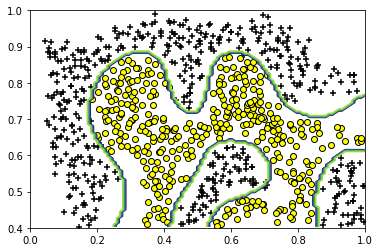

In [12]:
C = 30   # C value determines the error amount we want to have while training the model. More the C, less the error and prones to overfit.
sigma = 30   # Sigma value measures to what degree the shape can be loose from a circle.

svm = SVC(kernel='rbf', C=C, gamma=sigma)
svm.fit(X, y.ravel())

x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x1, x2 = np.meshgrid(x1, x2)
yp = svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

pos = (y == 1).ravel()
neg = (y == 0).ravel()
plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
plt.scatter(X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
plt.xlim(0, 1)
plt.ylim(0.4, 1)
plt.contour(x1, x2, yp)
plt.show()


### 1.3 SVM using Gaussian Kernel with parameters defined in Function

- In the provided dataset, ex6data3.mat, you are given the variables X, y, Xval, yval. The provided code in ex6.m trains the    SVM classifier using the training set (X, y) using parameters loaded from dataset3Params.

- Your task is to use the cross validation set Xval, yval to determine the best C and sigma parameter to use. You should write any additional code necessary to help you search over the parameters C and sigma. 
- For both C and sigma, we suggest trying values in multiplicative steps (e.g., 0.01; 0.03; 0.1; 0.3; 1; 3; 10; 30).
- Note that you should try all possible pairs of values for C and sigma (e.g., C = 0.3 and sigma = 0.1). For example, if you try each of the 8 values listed above for C and for sigma2, you would end up training and evaluating (on the cross validation set) a total of 82 = 64 different models.
- After you have determined the best C and sigma parameters to use, you should modify the code in dataset3Params, filling in the best parameters you found.

Importing and visualizing 3rd DataSet

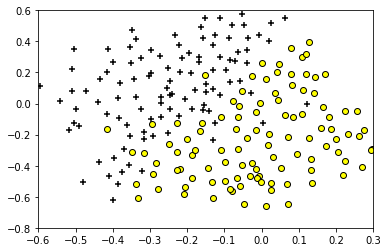

In [13]:
# Visualizing Dataset 3 
data = sio.loadmat('ex6data3.mat')
X = data['X']  # 211 x 2 matrix
y = data['y']  # 211 x 1 matrix
Xval = data['Xval']  # 200 x 2 matrix
yval = data['yval']  # 200 x 1 matrix

pos = (y == 1).ravel()
neg = (y == 0).ravel()
plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
plt.scatter(
    X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
plt.xlim(-0.6, 0.3)
plt.ylim(-0.8, 0.6)
plt.show()


In [14]:
#Defining Datasetparam 
def dataset3_params(X, y, Xval, yval):
    C_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    sigma_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    scores = np.zeros((len(C_vec), len(sigma_vec)))
    for i in range(len(C_vec)):
        for j in range(len(sigma_vec)):
            svm = SVC(kernel='rbf', C=C_vec[i], gamma=sigma_vec[j])
            svm.fit(X, y.ravel())
            scores[i, j] = accuracy_score(yval, svm.predict(Xval))
    max_c_index, max_s_index = np.unravel_index(scores.argmax(), scores.shape)
    return (C_vec[max_c_index], sigma_vec[max_s_index])

In [15]:
# RBF Kernel (Dataset 3)
C, sigma = dataset3_params(X, y, Xval, yval)

In [16]:
#Fitting the model
svm = SVC(kernel='rbf', C=C, gamma=sigma)
svm.fit(X, y.ravel())

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=30, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Now it has found the best parameters C = 3 and sigma = 30 for validating the cross validation dataset.

Lets visualize the decision boundary now.

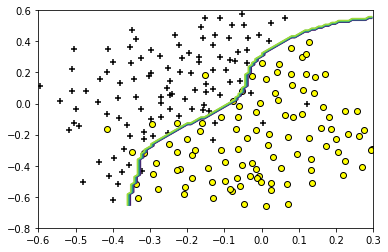

In [17]:
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
x1, x2 = np.meshgrid(x1, x2)
yp = svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)

pos = (y == 1).ravel()
neg = (y == 0).ravel()
plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
plt.scatter(X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')
plt.xlim(-0.6, 0.3)
plt.ylim(-0.8, 0.6)
plt.contour(x1, x2, yp)
plt.show()
